In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('Bank_Churn_cleaned.csv')
df.head(3)

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,G_France,G_Germany,G_Spain
0,15634602,Hargrave,619,0,42.0,2,101348.88,0.00,1,1,1,1,1,0,0
1,15647311,Hill,608,0,41.0,1,112542.58,83807.86,1,1,1,0,0,0,1
2,15619304,Onio,502,0,42.0,8,113931.57,159660.80,3,0,0,1,1,0,0


In [3]:
data = pd.read_excel('Bank_Churn_Messy.xlsx')
data.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57


In [4]:
data2 = pd.read_excel('Bank_Churn_Messy.xlsx',  sheet_name = 'Account_Info')
data2.head(3)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0


# Columns description
# Cstomer_info
1. 'CustomerID' = this column has a 8 digit customerID's stored as int64
2. 'surname' = Surnames of Customers stored as Object(string)
3. 'CreditScore' = Credit score of each customer stored as int64
4. 'Geography' = Contries where Customer belog to stored as object(string)
5. 'Gender' = Gender of customer stored as Object
6. 'age' = Age of Customer stored as float
7. 'Tenure' = How many years Relation customer have with bank stored as int64
8.  'EstimatedSalary' = Salary of Cutomer

# Account_info
1. 'CustomerID' = this column has a 8 digit customerID's stored as int64
2. 'Balance' = Available balance in cutomers bank account
3. 'NumofProducts' = Number of bank products cutomer uses (eg.saving account, credit card)
4. 'HasCrCard' = whether the customer has credit card (1=yes, 0=No)
5. 'IsActiveMember' = whether the customer is an active member (1=yes, 0=No)
6. 'Exited' = whether the customer has churned (1=yes, 0=No) 

# Isuues with Data
1. Dirty Data:
    Table - 'df'
    - 3 surnames and 3 Ages are missing in same rows - 'Missing data' - Done
    - surname 'walker' whole Row 3 times and 'Hargrave' whole Row 1 time is duplicate entry - 'Accuracy' - Done
    - EstimatedSalary column have some -ve values - Done
    - EstimatedSalary and Balance considered as object - Done
    - In Geography FRA and France - need to replace FRA with France - Done
   
3. Messy Data:

In [5]:
df = pd.merge(data,data2,on = 'CustomerId', how = 'left')
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0


In [6]:
df_copy = df.copy()
df_copy.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure_x,NumOfProducts,Tenure_y,Exited
count,1.000400e+04,10004.000000,10001.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.919108,5.012195,1.529988,5.012195,0.203719
std,7.193218e+04,96.665531,10.488725,2.891806,0.581635,2.891806,0.402782
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,1.000000,3.000000,0.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,1.000000,5.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,10.000000,1.000000


In [9]:
df[df['Surname'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-€999999,€141349.43,1,Yes,3,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-€999999,€120193.42,1,No,6,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-€999999,€0.0,1,Yes,2,Yes,0


In [10]:
df[df['Age'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-€999999,€141349.43,1,Yes,3,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-€999999,€120193.42,1,No,6,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-€999999,€0.0,1,Yes,2,Yes,0


In [11]:
df[df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [12]:
# Removed Duplicated Rows
df = df.drop_duplicates(subset=['CustomerId'], keep = 'first')

In [13]:
# Replacing FRA with France
df['Geography'] = df['Geography'].replace('FRA', 'France')

In [14]:
# Replacing French with France 
df['Geography'] = df['Geography'].replace('French', 'France')

In [15]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,France,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,5,No,0
9997,15569892,Johnstone,516,France,Male,35.0,10,€101699.77,€57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,France,Female,36.0,7,€42085.58,€0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1


In [16]:
df.dropna(subset=['Surname', 'Age'], inplace=True)

In [17]:
# Removed '€' from the EstimatedSalary and Balance
df['EstimatedSalary'] = df['EstimatedSalary'].astype(str).str.replace('€', '').astype(float)
df['Balance'] = df['Balance'].astype(str).str.replace('€', '').astype(float)

In [18]:
# Encoding
# 1. Label Encoding: For Binary Categorical Columns
label_encoder = LabelEncoder()

# Gender
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# HasCrCard
df['HasCrCard'] = df['HasCrCard'].map({'Yes': 1, 'No': 0})

# IsActiveMember
df['IsActiveMember'] = df['IsActiveMember'].map({'Yes': 1, 'No': 0})

In [19]:
# One-Hot Encoding: For Nominal Column with multiple categories
df = pd.get_dummies(df, columns=['Geography'])

In [20]:
df[['Geography_France','Geography_Germany', 'Geography_Spain']] = df[['Geography_France','Geography_Germany', 'Geography_Spain']].astype(int)

In [21]:
df.rename(columns={
    'Geography_France': 'G_France',
    'Geography_Germany': 'G_Germany',
    'Geography_Spain': 'G_Spain'
}, inplace=True)


In [22]:
df.drop('Tenure_y', axis=1, inplace=True)

In [23]:
df.rename(columns={'Tenure_x':'Tenure'}, inplace=True)

In [24]:
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Exploratory Data Analysis
### Univariate Analysis - Categorical Columns

<Axes: xlabel='Gender'>

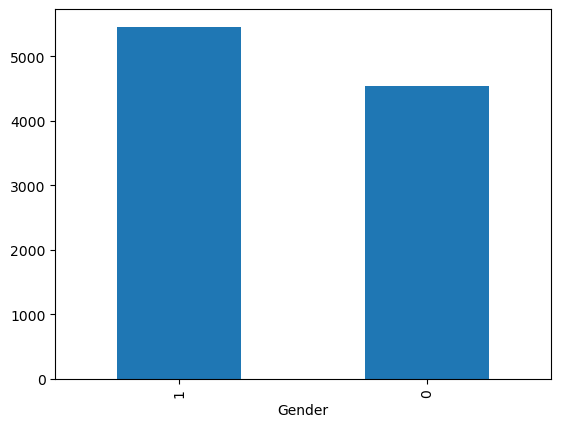

In [25]:
df['Gender'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

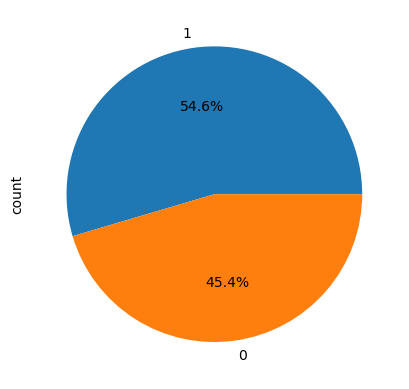

In [26]:
df['Gender'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [27]:
df['Gender'].isnull().sum()

0

<Axes: xlabel='HasCrCard'>

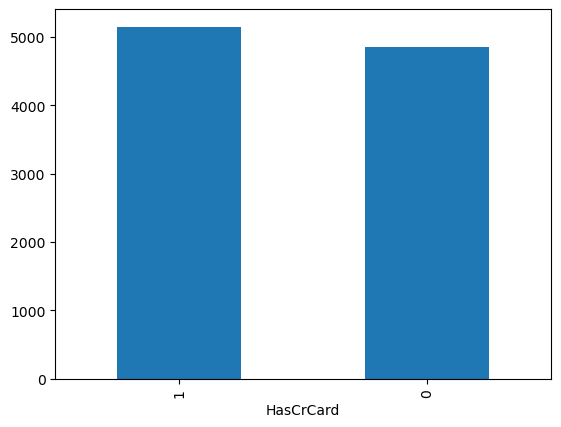

In [28]:
df['HasCrCard'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

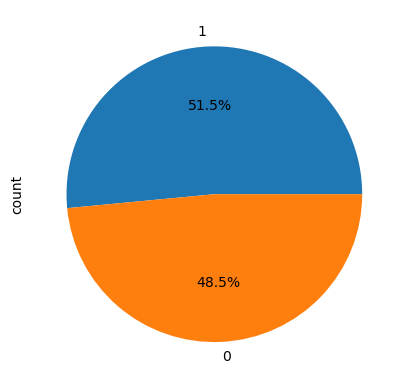

In [29]:
df['HasCrCard'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='G_France'>

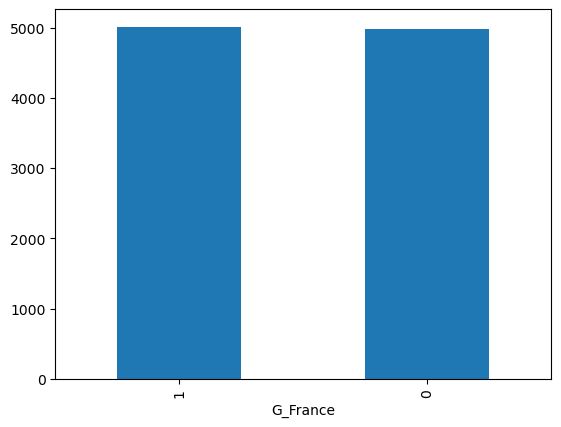

In [30]:
df['G_France'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

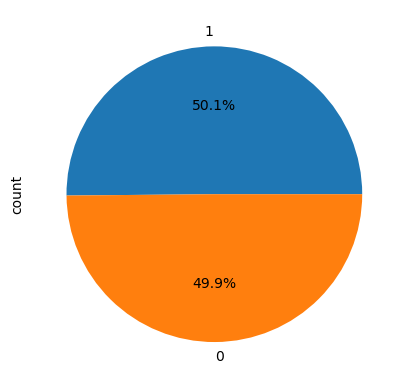

In [31]:
df['G_France'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='G_Germany'>

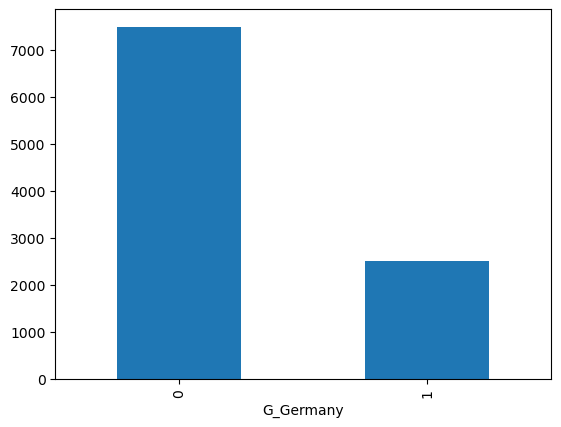

In [32]:
df['G_Germany'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

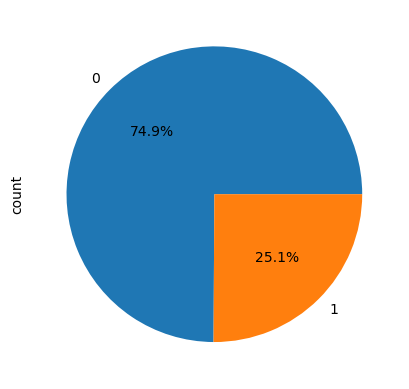

In [33]:
df['G_Germany'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='G_Spain'>

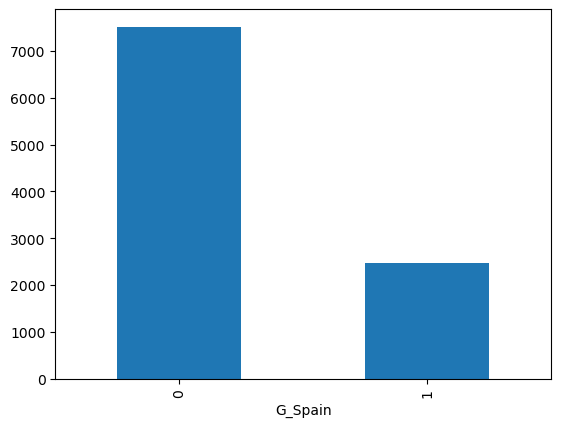

In [34]:
df['G_Spain'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

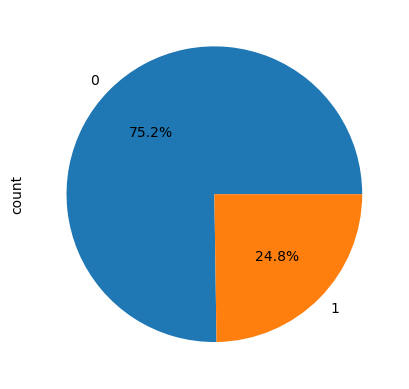

In [35]:
df['G_Spain'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='IsActiveMember'>

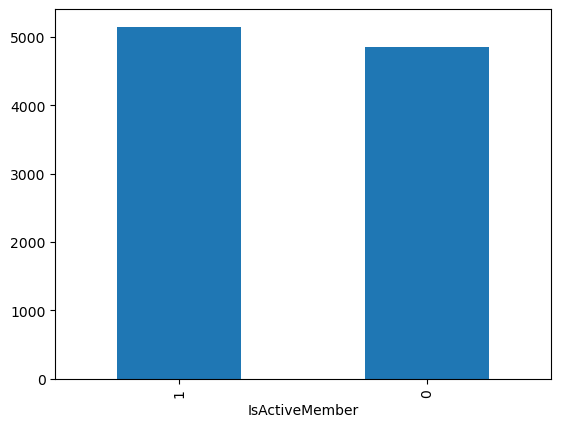

In [36]:
df['IsActiveMember'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

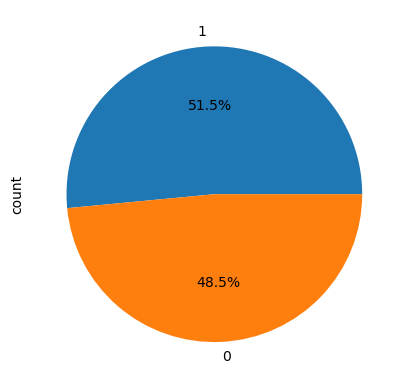

In [37]:
df['IsActiveMember'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Univariate Analysis of Numerical Columns

<Axes: ylabel='Frequency'>

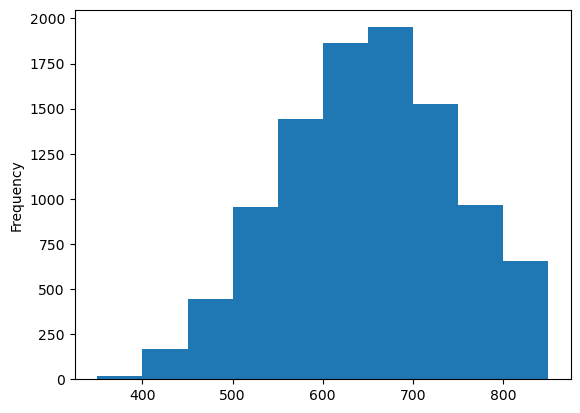

In [38]:
df['CreditScore'].plot(kind='hist')

<Axes: ylabel='Density'>

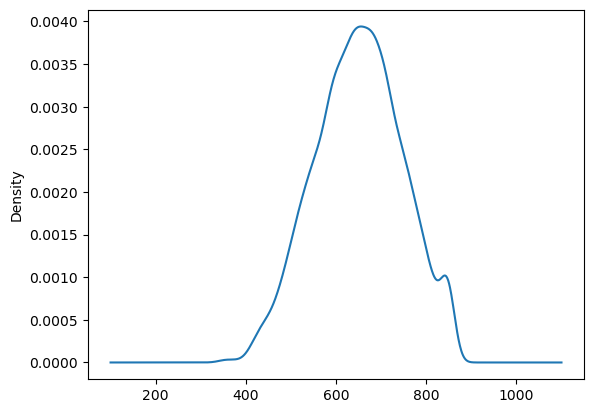

In [39]:
df['CreditScore'].plot(kind='kde')

<Axes: ylabel='Frequency'>

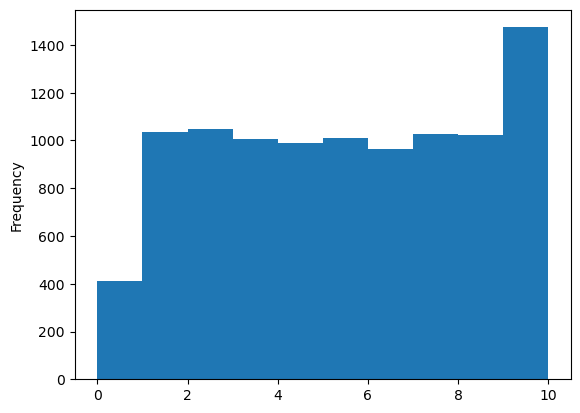

In [40]:
df['Tenure'].plot(kind='hist')

<Axes: ylabel='Density'>

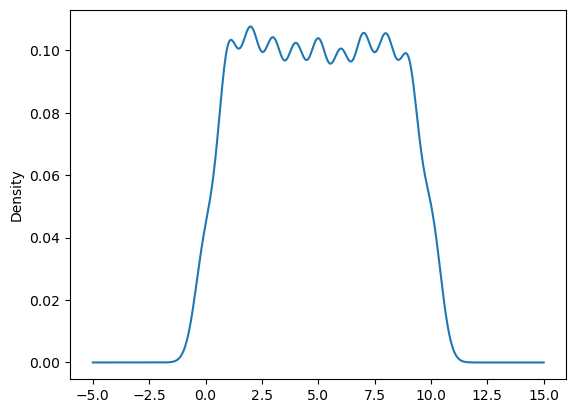

In [41]:
df['Tenure'].plot(kind='kde')

In [42]:
df['Tenure'].skew()

0.010716341942018964

<Axes: ylabel='Frequency'>

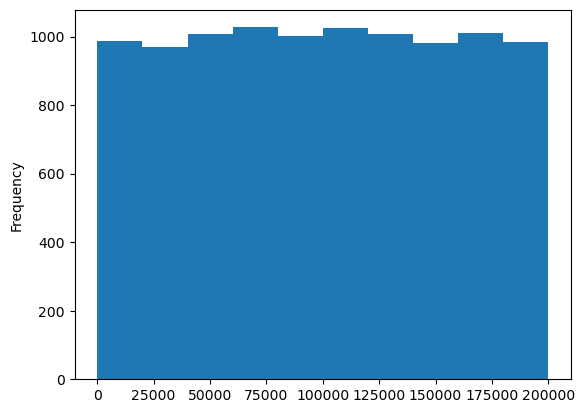

In [43]:
df['EstimatedSalary'].plot(kind='hist')

<Axes: ylabel='Density'>

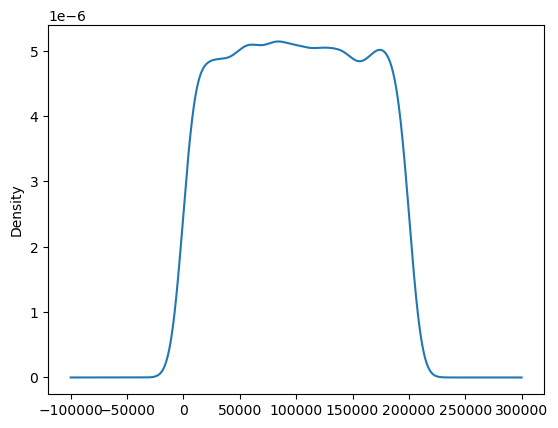

In [44]:
df['EstimatedSalary'].plot(kind='kde')

In [45]:
df['EstimatedSalary'].skew()

0.0019858276953208624

<Axes: ylabel='Frequency'>

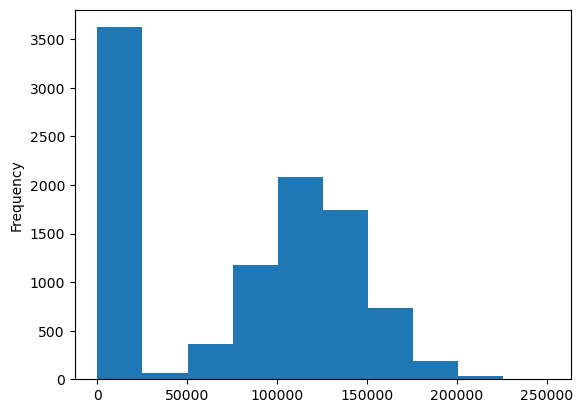

In [46]:
df['Balance'].plot(kind='hist')

<Axes: ylabel='Density'>

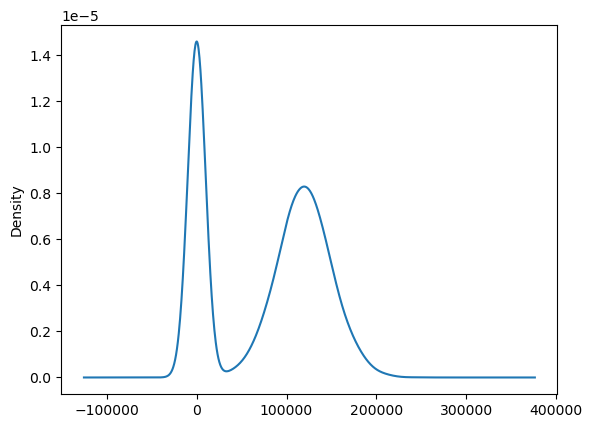

In [47]:
df['Balance'].plot(kind='kde')

### Bivariate Analysis

In [48]:
Features = [ 'CreditScore', 'Gender', 'Age', 'Tenure',
       'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'G_France', 'G_Germany', 'G_Spain','BalanceToSalaryRatio']

In [49]:
df_Heatmap =  [ 'CreditScore', 'Gender', 'Age', 'Tenure',
       'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'G_France', 'G_Germany', 'G_Spain','BalanceToSalaryRatio', 'Exited']

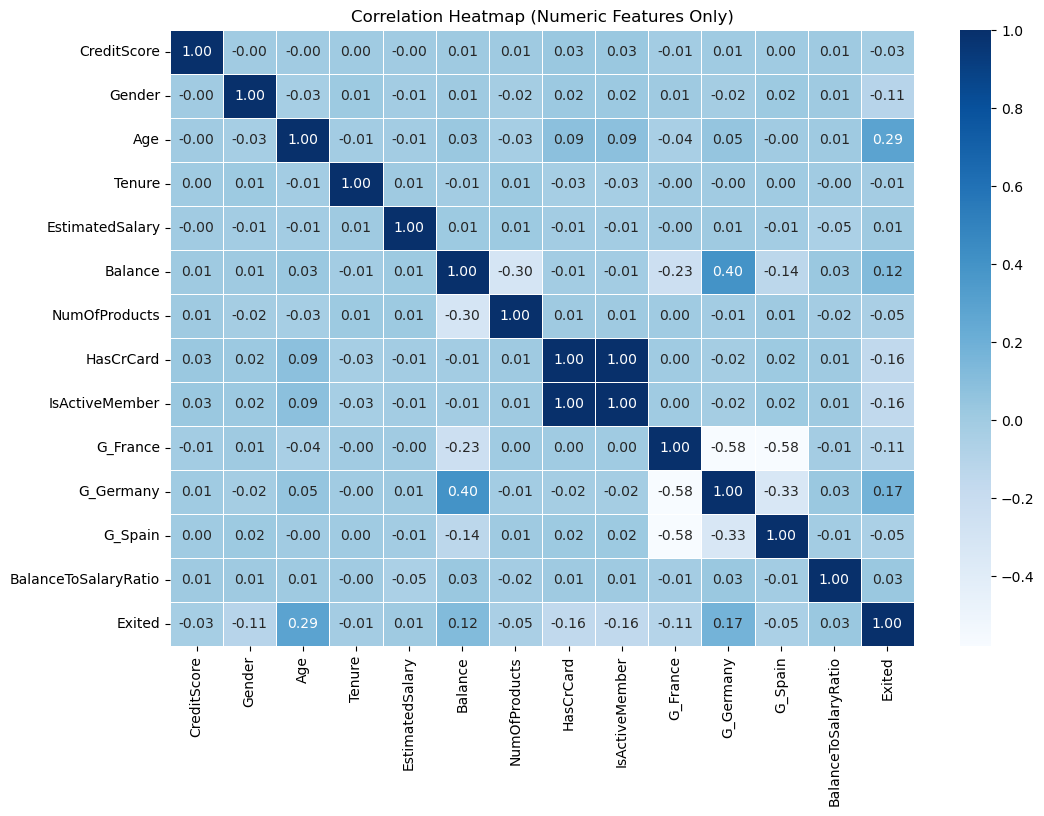

In [50]:
numeric_df = df[df_Heatmap]

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


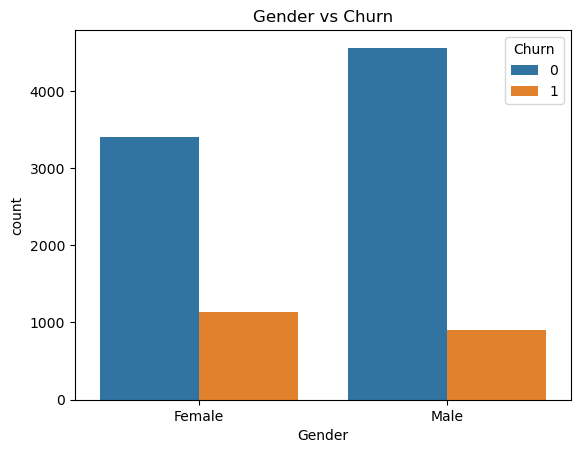

In [51]:
#Churn Rate by Gender
sns.countplot(x='Gender', hue='Exited', data=df)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Gender vs Churn')
plt.legend(title='Churn')
plt.show()

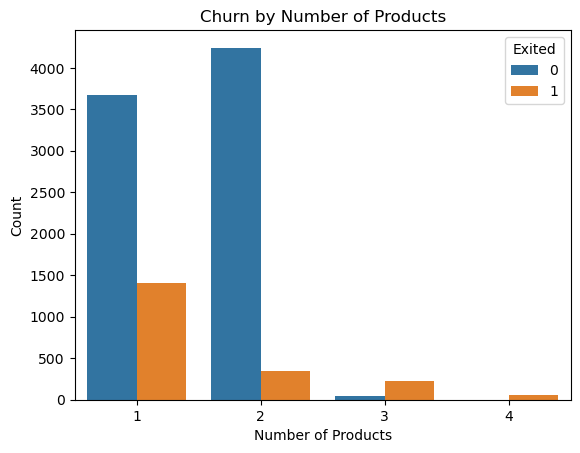

In [52]:
# Churn by Number of Products
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

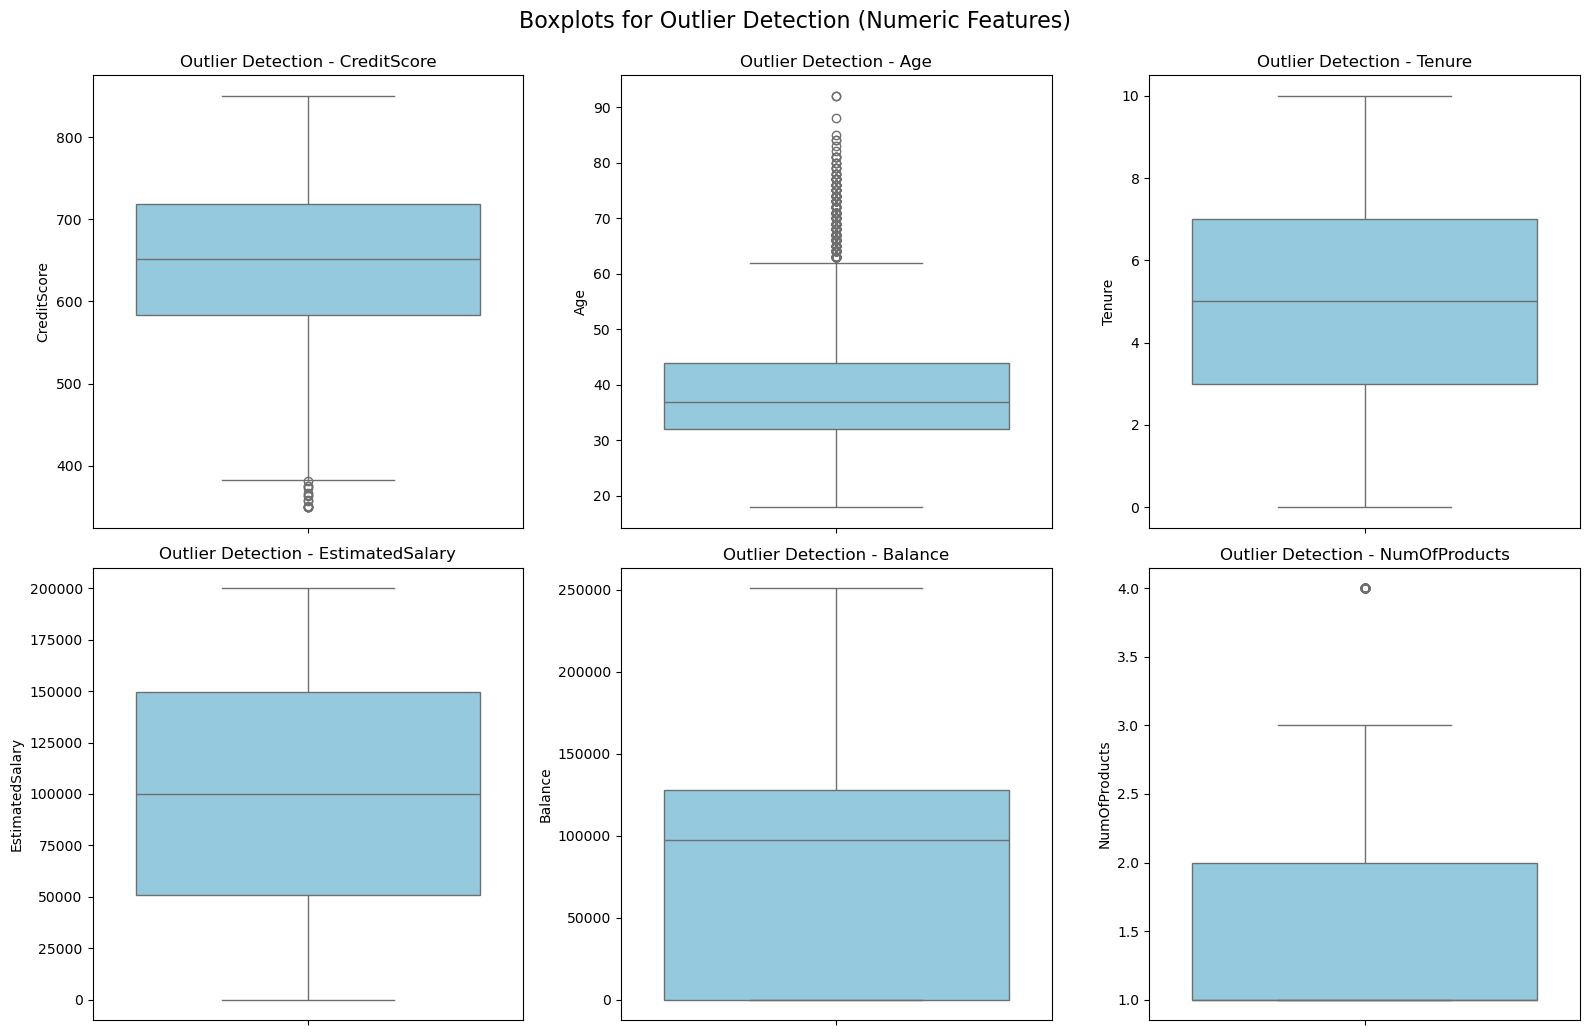

In [89]:
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts']

# Create boxplots for all numeric features
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outlier Detection - {col}')
    plt.tight_layout()

plt.suptitle('Boxplots for Outlier Detection (Numeric Features)', fontsize=16, y=1.03)
plt.show()

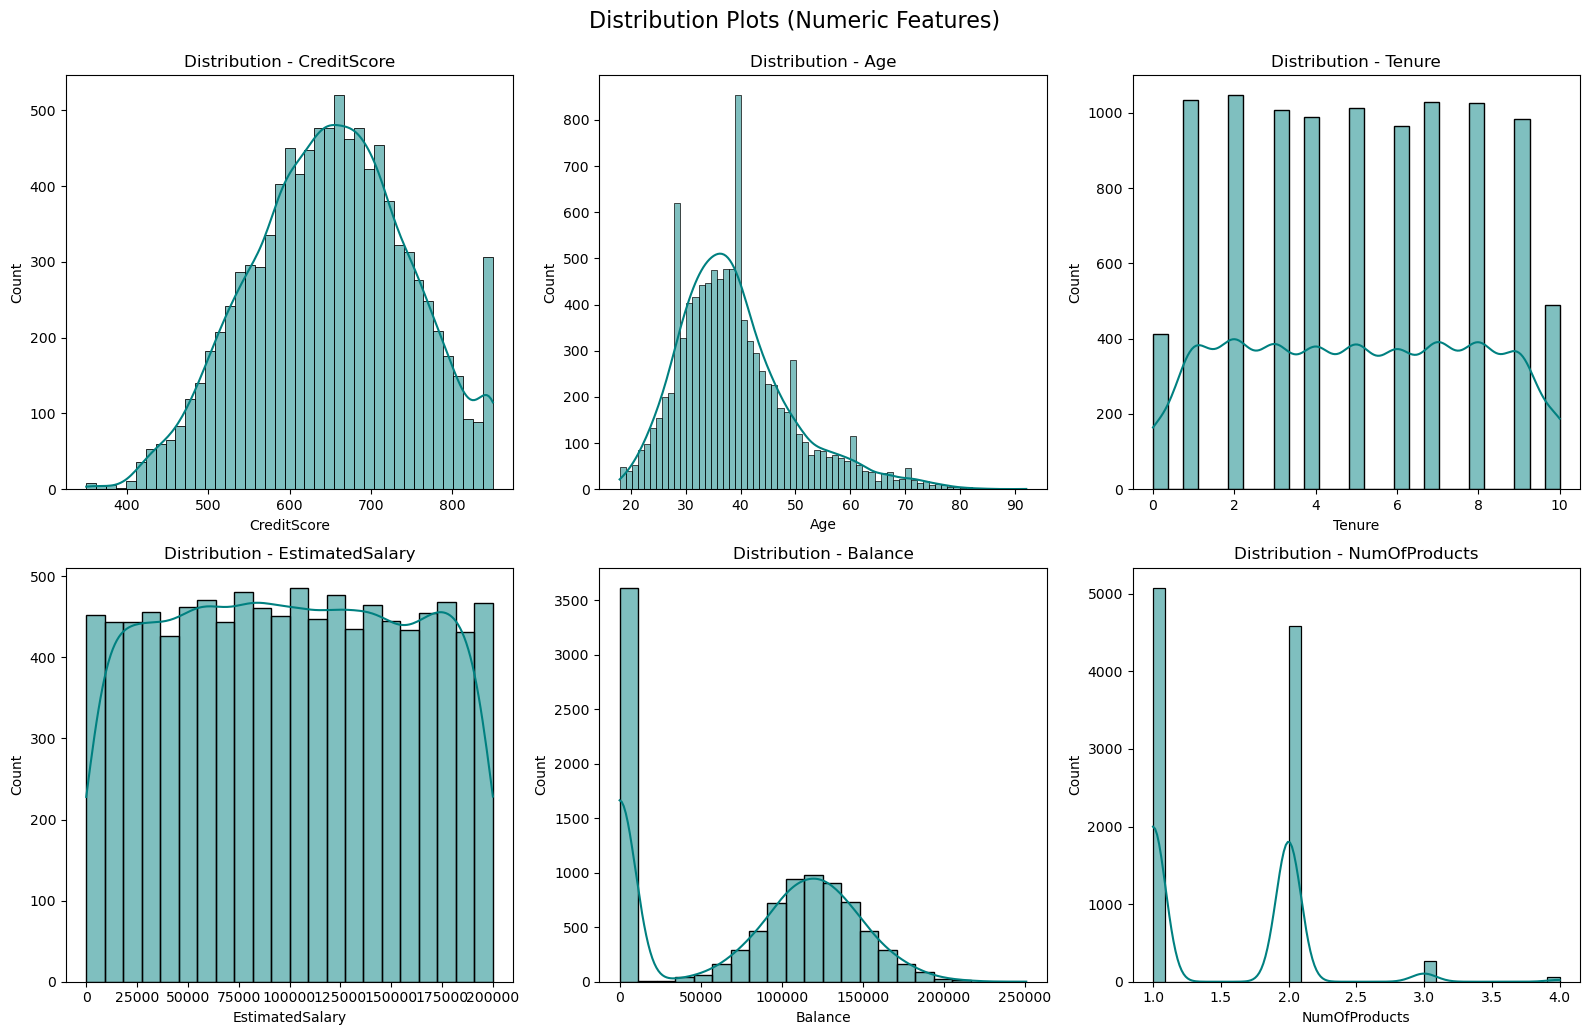

In [90]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution - {col}')
    plt.tight_layout()

plt.suptitle('Distribution Plots (Numeric Features)', fontsize=16, y=1.03)
plt.show()

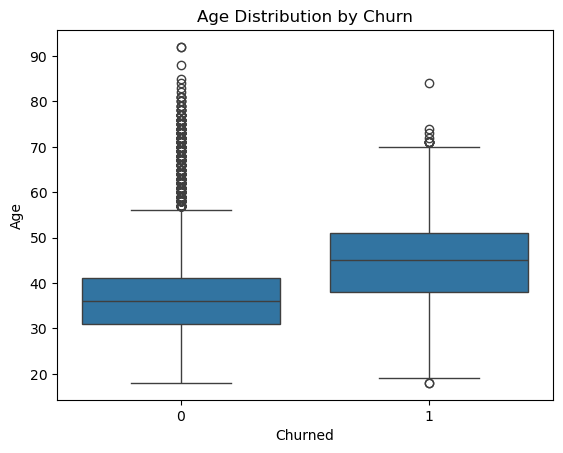

In [53]:
# Boxplot: Age vs. Churn
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Churn')
plt.xlabel('Churned')
plt.ylabel('Age')
plt.show()

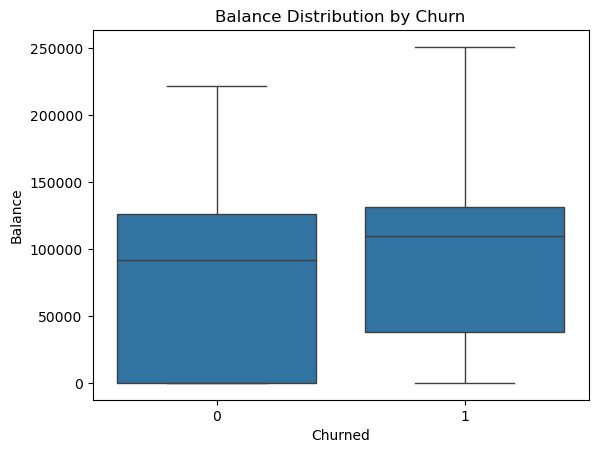

In [54]:
# Boxplot: Balance vs. Churn
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn')
plt.xlabel('Churned')
plt.ylabel('Balance')
plt.show()


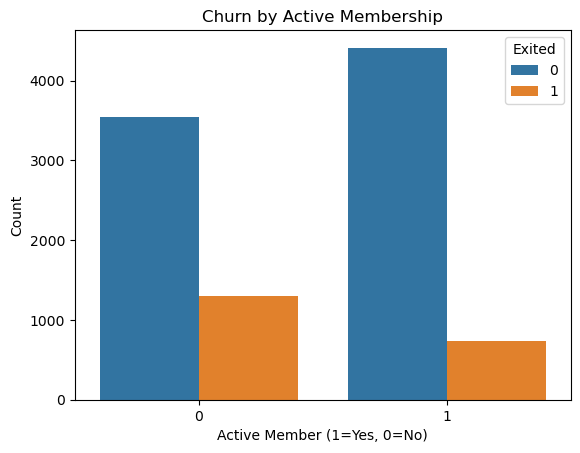

In [55]:
# Churn by Active Membership
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Active Membership')
plt.xlabel('Active Member (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

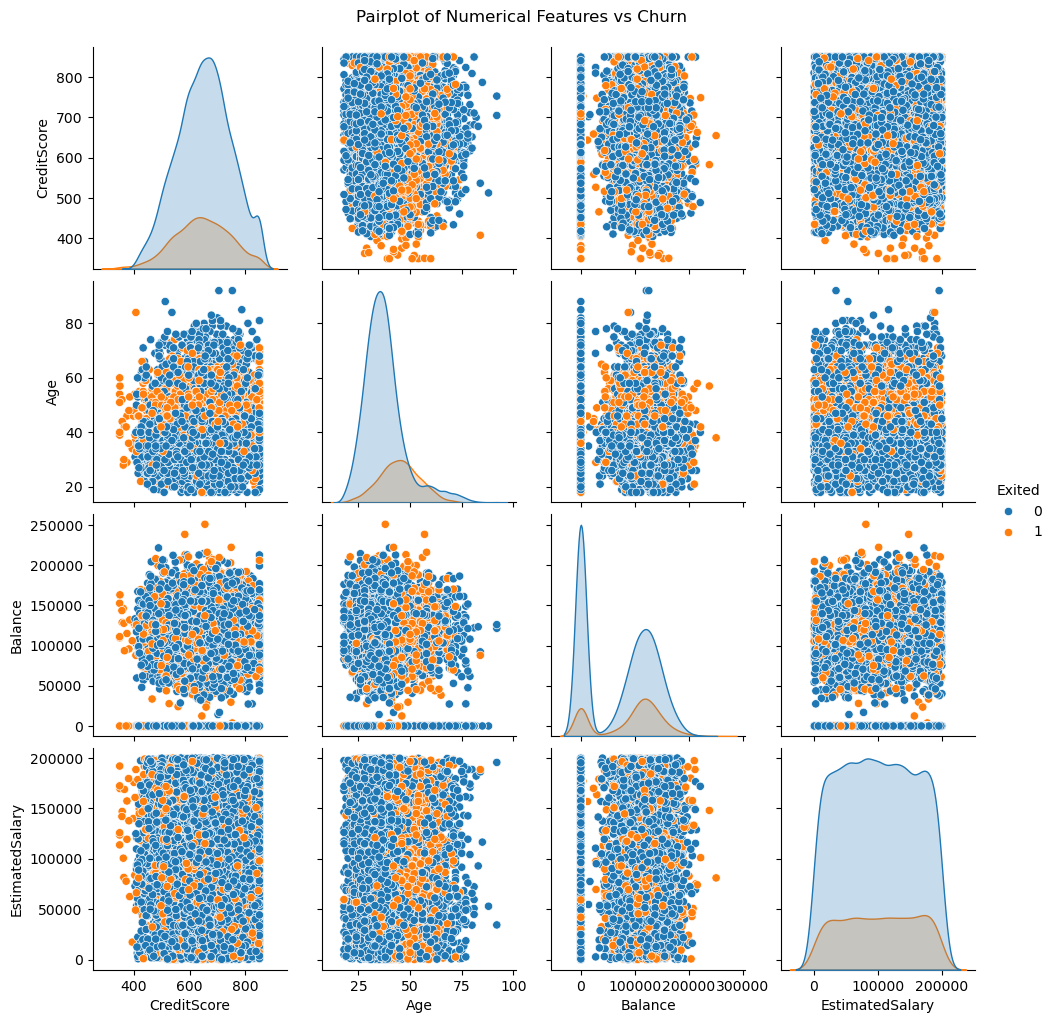

In [56]:
# Pairplot for Continuous Features
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.suptitle('Pairplot of Numerical Features vs Churn', y=1.02)
plt.show()

In [57]:
# Churn by Geography (One-Hot Encoded)
df_geo = df[['G_France', 'G_Germany', 'G_Spain', 'Exited']]

geo_churn = df_geo.groupby(['G_France', 'G_Germany', 'G_Spain']).mean()['Exited'].reset_index()
print(geo_churn)


   G_France  G_Germany  G_Spain    Exited
0         0          0        1  0.166801
1         0          1        0  0.324561
2         1          0        0  0.161580


In [58]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'G_France', 'G_Germany', 'G_Spain',
       'BalanceToSalaryRatio'],
      dtype='object')

# Building Machine learning Models

In [59]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,G_France,G_Germany,G_Spain,BalanceToSalaryRatio
0,15634602,Hargrave,619,0,42.0,2,101348.88,0.00,1,1,1,1,1,0,0,0.000000
2,15647311,Hill,608,0,41.0,1,112542.58,83807.86,1,1,1,0,0,0,1,0.744677
3,15619304,Onio,502,0,42.0,8,113931.57,159660.80,3,0,0,1,1,0,0,1.401375
4,15701354,Boni,699,0,39.0,1,93826.63,0.00,2,0,0,0,1,0,0,0.000000
5,15737888,Mitchell,850,0,43.0,2,79084.10,125510.82,1,1,1,0,0,0,1,1.587055


In [60]:
x = df[Features]
y = df['Exited']

In [61]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=42)

In [62]:
# Scalaing Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Random Forest Model

In [63]:
model = RandomForestClassifier(n_estimators = 100, random_state=42) 

In [64]:
model.fit(X_train_scaled ,y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred = model.predict(X_test_scaled )

In [94]:
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
F1_score = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

In [95]:
print('conf_matrix = ', conf_matrix)
print('class_report = ', class_report)
print('accuracy = ', accuracy)
print('F1_score = ', F1_score)
print('roc_auc = ', roc_auc)

conf_matrix =  [[1516   65]
 [ 228  191]]
class_report =                precision    recall  f1-score   support

           0       0.87      0.96      0.91      1581
           1       0.75      0.46      0.57       419

    accuracy                           0.85      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

accuracy =  0.8535
F1_score =  0.5659259259259259
roc_auc =  0.7073670179442937


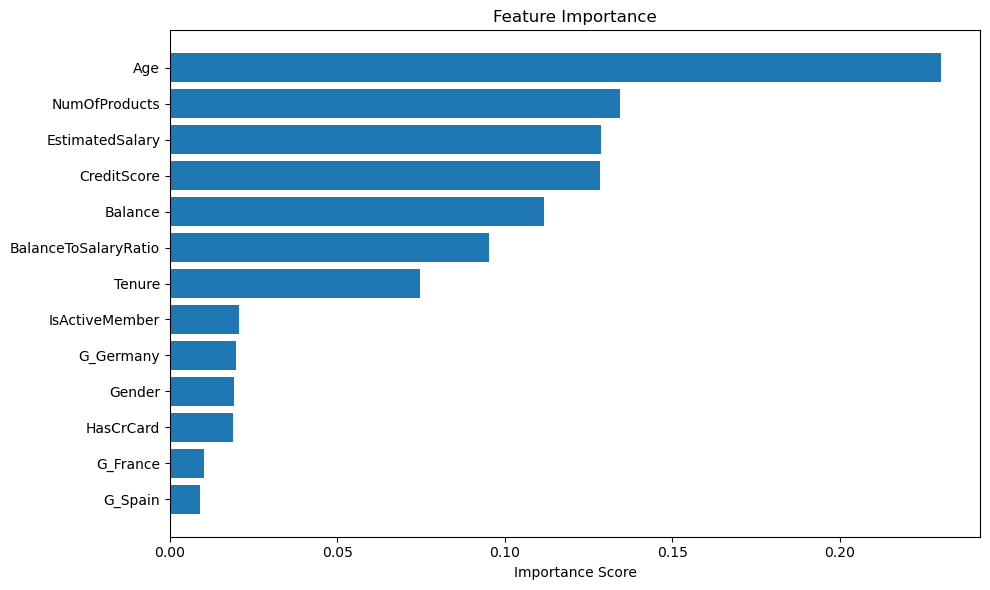

In [68]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  
names = [Features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(len(Features)), importances[indices])
plt.yticks(range(len(Features)), names)
plt.gca().invert_yaxis() 
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Building Logistic Regression Model

In [69]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled ,y_train)

LogisticRegression(random_state=42)

In [70]:
y_pred_log = log_reg.predict(X_test_scaled )

In [71]:
conf_matrix_log = confusion_matrix(y_test,y_pred_log)
class_report_log = classification_report(y_test,y_pred_log)
accuracy_log = accuracy_score(y_test,y_pred_log)
F1_score = f1_score(y_test,y_pred_log)
roc_auc = roc_auc_score(y_test,y_pred_log)

In [72]:
print('conf_matrix_log = ', conf_matrix_log)
print('class_report_log = ', class_report_log)
print('accuracy_log = ', accuracy_log)
print("F1_Score = ", F1_score)
print("roc_auc = ", roc_auc)

conf_matrix_log =  [[1522   59]
 [ 326   93]]
class_report_log =                precision    recall  f1-score   support

           0       0.82      0.96      0.89      1581
           1       0.61      0.22      0.33       419

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.78      0.81      0.77      2000

accuracy_log =  0.8075
F1_Score =  0.3257443082311734
roc_auc =  0.5923194437525569


# Building XGBoostClassifier Model

In [73]:
model_XG = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_XG.fit(X_train_scaled , y_train)

C:\Users\niraj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [74]:
y_pred_XG = model_XG.predict(X_test_scaled )

In [75]:
conf_matrix_XG = confusion_matrix(y_test,y_pred_XG)
class_report_XG = classification_report(y_test,y_pred_XG)
accuracy_XG = accuracy_score(y_test,y_pred_XG)

In [76]:
print('conf_matrix_XG = ', conf_matrix_XG)
print('class_report_XG = ', class_report_XG)
print('accuracy_XG = ', accuracy_XG)

conf_matrix_XG =  [[1480  101]
 [ 218  201]]
class_report_XG =                precision    recall  f1-score   support

           0       0.87      0.94      0.90      1581
           1       0.67      0.48      0.56       419

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000

accuracy_XG =  0.8405


# XGBoost Hyperparameter Tuning

In [77]:
Htune_XG = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
Htune_XG.fit(X_train_scaled ,y_train)

C:\Users\niraj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [78]:
Htune_pred = Htune_XG.predict(X_test_scaled )

In [91]:
conf_matrix_tuneXG = confusion_matrix(y_test,Htune_pred)
class_report_tuneXG = classification_report(y_test,Htune_pred)
accuracy_tuneXG = accuracy_score(y_test,Htune_pred)
F1_score = f1_score(y_test,Htune_pred)
roc_auc = roc_auc_score(y_test,Htune_pred)

In [92]:
print('conf_matrix_tuneXG = ', conf_matrix_tuneXG)
print('class_report_tuneXG = ', class_report_tuneXG)
print('accuracy_tuneXG = ', accuracy_tuneXG)
print('F1_score = ', F1_score )
print('roc_auc = ', roc_auc)

conf_matrix_tuneXG =  [[1511   70]
 [ 223  196]]
class_report_tuneXG =                precision    recall  f1-score   support

           0       0.87      0.96      0.91      1581
           1       0.74      0.47      0.57       419

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

accuracy_tuneXG =  0.8535
F1_score =  0.5722627737226277
roc_auc =  0.7117523273841063


# Model Performance Comparison 

In [81]:
metrics = {
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_log),
        roc_auc_score(y_test, y_pred_log)
    ],
    "Random Forest": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
    ],
    "XGBoost Tuned": [
        accuracy_score(y_test, Htune_pred),
        precision_score(y_test, Htune_pred),
        recall_score(y_test, Htune_pred),
        f1_score(y_test, Htune_pred),
        roc_auc_score(y_test, Htune_pred)
    ]
}

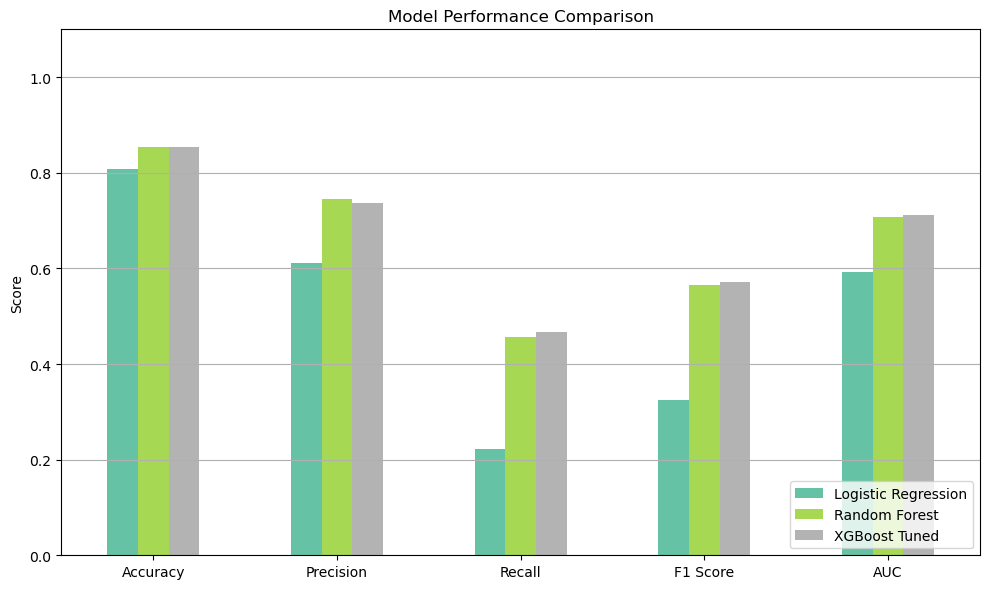

In [82]:
df_metrics = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Plot the bar chart
df_metrics.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

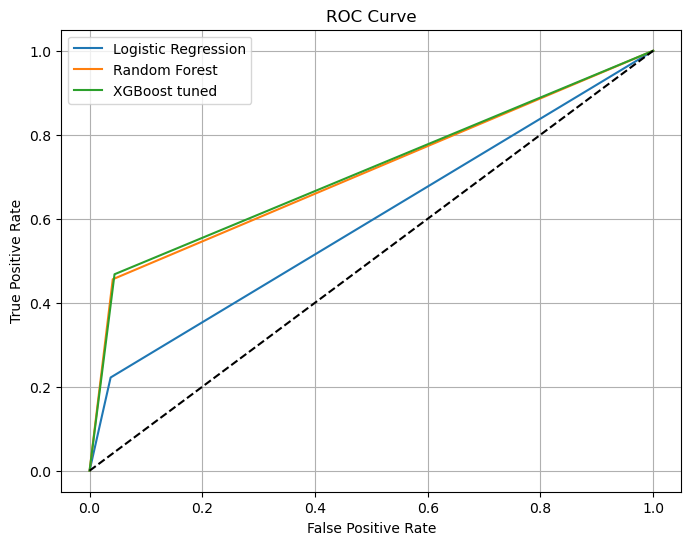

In [83]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, Htune_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost tuned')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


# Finding Features importance 

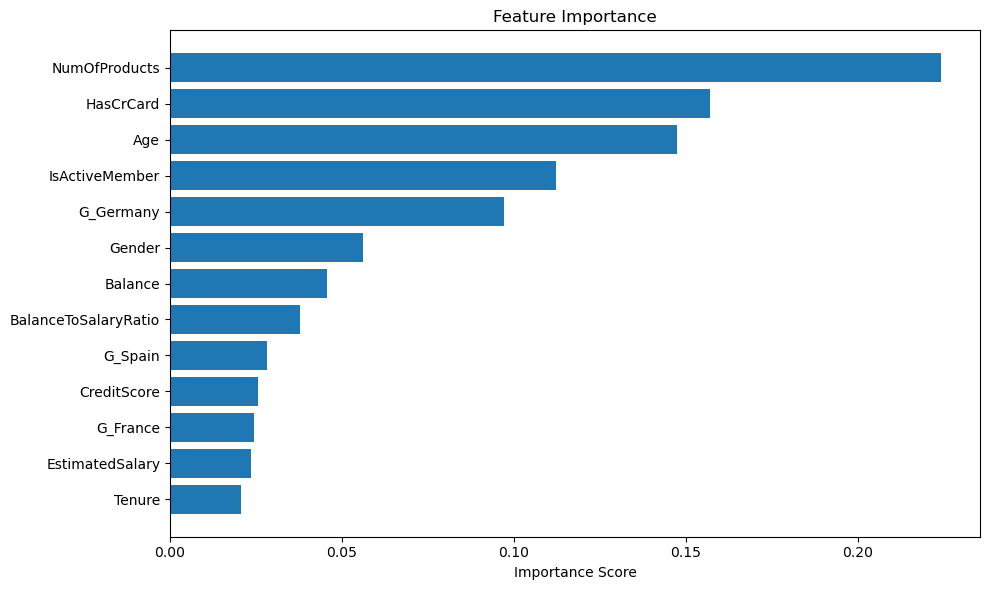

In [102]:
importances = Htune_XG.feature_importances_
indices = np.argsort(importances)[::-1]
names = [Features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(len(Features)), importances[indices])
plt.yticks(range(len(Features)), names)
plt.gca().invert_yaxis() 
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [100]:
Features

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'EstimatedSalary',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'G_France',
 'G_Germany',
 'G_Spain',
 'BalanceToSalaryRatio']

<Axes: title={'center': 'Importance by Cover'}, xlabel='Importance score', ylabel='Features'>

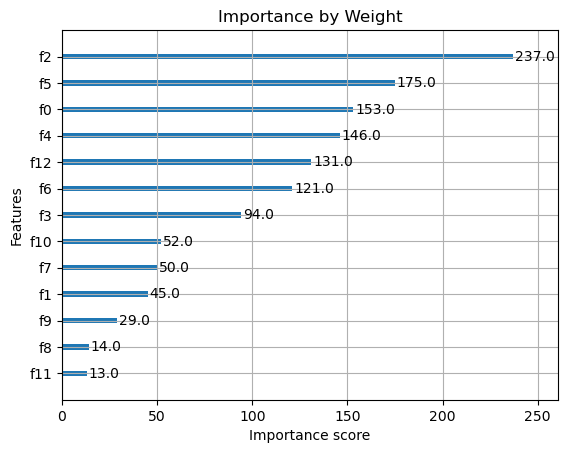

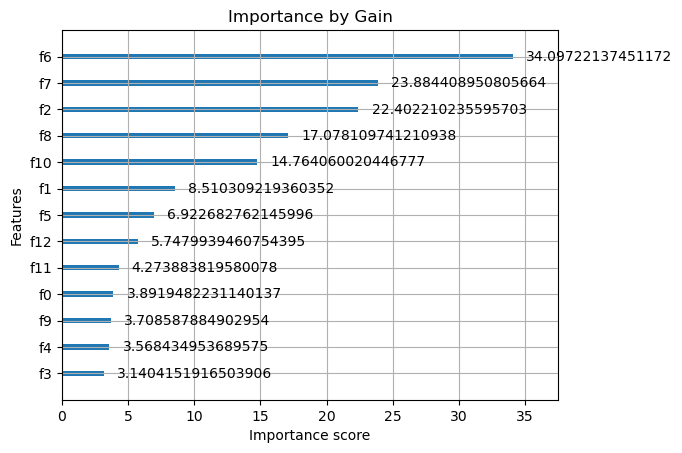

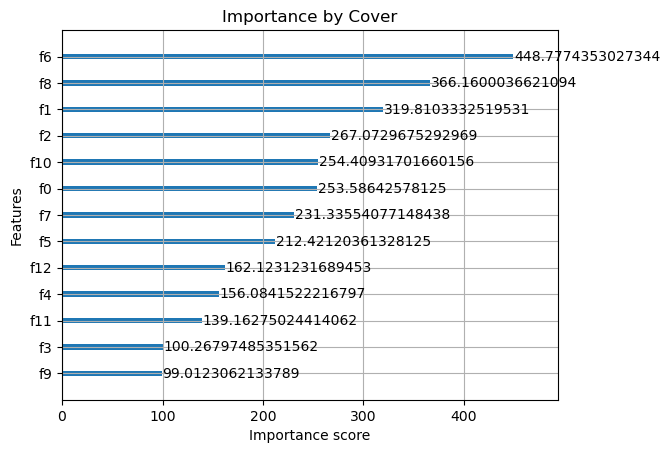

In [104]:
from xgboost import plot_importance

# Plot feature importance by weight
plot_importance(Htune_XG, importance_type='weight', title='Importance by Weight')

# Plot feature importance by gain
plot_importance(Htune_XG, importance_type='gain', title='Importance by Gain')

# Plot feature importance by cover
plot_importance(Htune_XG, importance_type='cover', title='Importance by Cover')


In [85]:
import shap
explainer = shap.Explainer(Htune_XG, X_train_scaled)
shap_values = explainer(X_train_scaled)


 97%|=================== | 7784/7997 [00:35<00:00]       

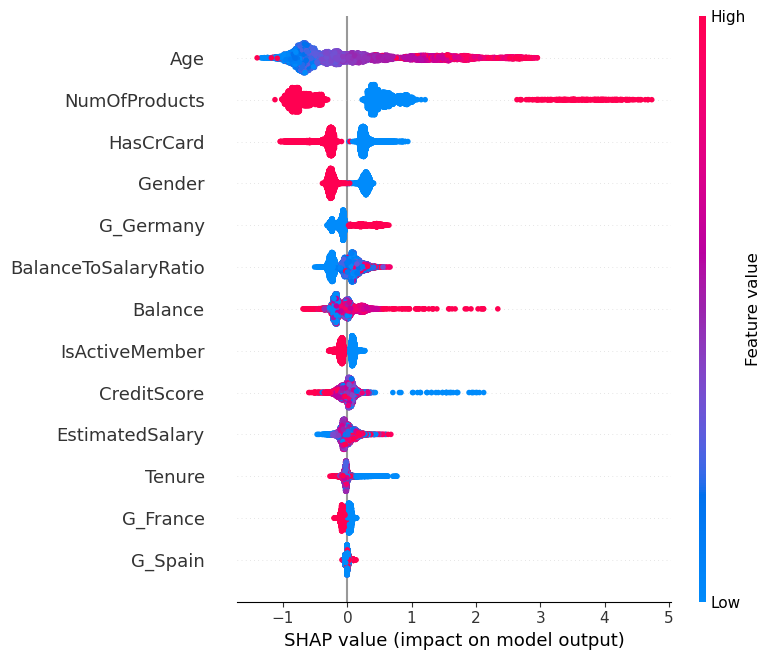

In [86]:
shap.summary_plot(shap_values, X_train_scaled,feature_names = Features)

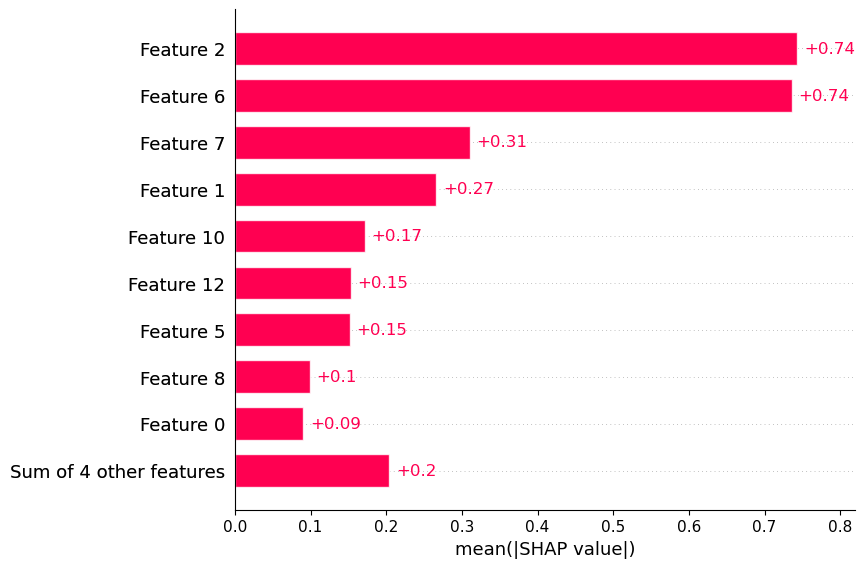

In [87]:
shap.plots.bar(shap_values)